<a href="https://colab.research.google.com/github/CharlitonNogueira/capitulo-1/blob/main/prova_questao2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
#IMPORTANDO AS BIBLIOTECAS
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [134]:
#CARREGAR O ARQUIVO CSV COM A LISTA
df = pd.read_csv('/content/indice_ipam.csv')
df.head()

,data,ipa_m
0,jan/11,0.60
1,fev/11,1.07
2,mar/11,0.68
3,abr/11,0.51
4,mai/11,0.40


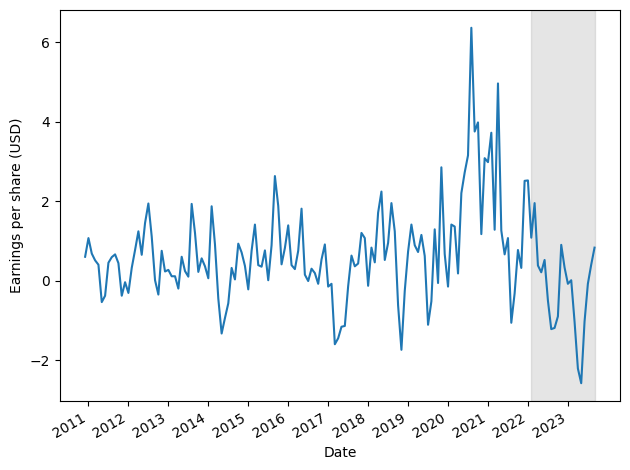

In [135]:
#PLOTANDO O GRAFICO
fig, ax = plt.subplots()

ax.plot(df['data'], df['ipa_m'])
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(134, 153, color='#808080', alpha=0.2)

plt.xticks(np.arange(1, 156, 12), [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

fig.autofmt_xdate()
plt.tight_layout()

In [136]:
#ATRIBUINDO VALORES AO CONJUNTO DE TESTE E DE TREINO ONDE DELIMITA O CONJUNTO DE TREINO
#ATE A LINHA -20 E A DE TESTE ACIMA DE -20
train = df[:-20]
test = df[-20:]

In [137]:
#TIRANDO A MEDIA ARITIMETICA DOS VALORES DO CONJUNTO DE TREINO
historical_mean = np.mean(train['ipa_m'])
historical_mean

0.7434328358208955

In [138]:
#CRIANDO UMA NOVA COLUNA NA TABELA DO ARQUIVO INDICE_IPAM NO CONJUNTO TEST
test.loc[:, 'pred_mean'] = historical_mean

test

,data,ipa_m,pred_mean
134,mar/22,1.08,0.743433
135,abr/22,1.95,0.743433
136,mai/22,0.38,0.743433
137,jun/22,0.21,0.743433
138,jul/22,0.52,0.743433
139,ago/22,-0.50,0.743433
140,set/22,-1.22,0.743433
141,out/22,-1.19,0.743433
142,nov/22,-0.90,0.743433
143,dez/22,0.90,0.743433


In [139]:
#CALCULANDO O MAPE A PARTIR DE UMA EQUACAO MATEMATICA ONDE ENCONTRAMOS A MEDIA ARITIMETICA
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [140]:
#RELACIONA A MEDIA DO CONJUNTO TESTE DE VALORES REAIS COM A MEDIA DO CONJUNTO TESTE ESPERADA
#RESULTADO DA MAPE
mape_hist_mean = mape(test['ipa_m'], test['pred_mean'])
mape_hist_mean

573.9525665768965

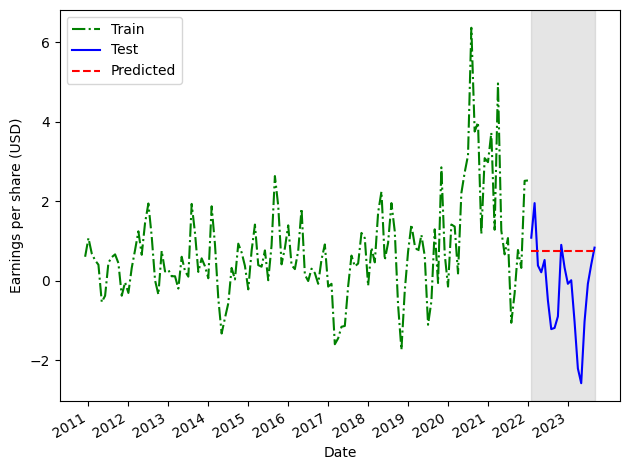

In [141]:
#PLOTANDO O GRAFICO COM OS RESULTADOS ANTERIORES PARA COMPARARMOS AS MEDIAS
fig, ax = plt.subplots()

ax.plot(train['data'], train['ipa_m'], 'g-.', label='Train')
ax.plot(test['data'], test['ipa_m'], 'b-', label='Test')
ax.plot(test['data'], test['pred_mean'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(134, 153, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(1, 156, 12), [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

fig.autofmt_xdate()
plt.tight_layout()

In [142]:
#UTILIZANDO OUTRA TECNICA INGENUA DE PREVISAO
#CALCULAR A MEDIA DO ULTIMO ANO
last_year_mean = np.mean(train['ipa_m'][-20:])
last_year_mean

2.244

In [143]:
#CRIANDOUMA NOVA COLUNA NO CONJUTNO TEST
test.loc[:, 'pred__last_yr_mean'] = last_year_mean

test

,data,ipa_m,pred_mean,pred__last_yr_mean
134,mar/22,1.08,0.743433,2.244
135,abr/22,1.95,0.743433,2.244
136,mai/22,0.38,0.743433,2.244
137,jun/22,0.21,0.743433,2.244
138,jul/22,0.52,0.743433,2.244
139,ago/22,-0.50,0.743433,2.244
140,set/22,-1.22,0.743433,2.244
141,out/22,-1.19,0.743433,2.244
142,nov/22,-0.90,0.743433,2.244
143,dez/22,0.90,0.743433,2.244


In [144]:
#RELACIONA A MEDIA DO CONJUNTO TESTE DE VALORES REAIS COM A MEDIA DO CONJUNTO TESTE ESPERADA
#RESULTADO DA MAPE
mape_last_year_mean = mape(test['ipa_m'], test['pred__last_yr_mean'])
mape_last_year_mean

1695.9534117534563

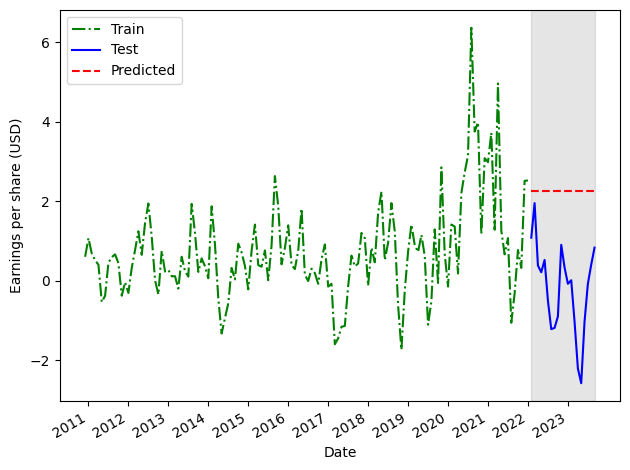

In [145]:
#PLOTANDO O GRAFICO  PARA VIZUALIZACAO DOS RESULTADOS
fig, ax = plt.subplots()

ax.plot(train['data'], train['ipa_m'], 'g-.', label='Train')
ax.plot(test['data'], test['ipa_m'], 'b-', label='Test')
ax.plot(test['data'], test['pred__last_yr_mean'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(134, 153, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(1, 156, 12), [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

fig.autofmt_xdate()
plt.tight_layout()

In [146]:
#PREVISAO INGENUA A PARTIR DO ULTIMO VALOR
last = train['ipa_m'].iloc[-1]
last

2.52

In [147]:
#CRIANDO UMA NOVA TABELA NO CONJUNTO DE TEST
test.loc[:, 'pred_last'] = last

test

,data,ipa_m,pred_mean,pred__last_yr_mean,pred_last
134,mar/22,1.08,0.743433,2.244,2.52
135,abr/22,1.95,0.743433,2.244,2.52
136,mai/22,0.38,0.743433,2.244,2.52
137,jun/22,0.21,0.743433,2.244,2.52
138,jul/22,0.52,0.743433,2.244,2.52
139,ago/22,-0.50,0.743433,2.244,2.52
140,set/22,-1.22,0.743433,2.244,2.52
141,out/22,-1.19,0.743433,2.244,2.52
142,nov/22,-0.90,0.743433,2.244,2.52
143,dez/22,0.90,0.743433,2.244,2.52


In [148]:
#RELACIONA A MEDIA DO CONJUNTO TESTE DE VALORES REAIS COM A MEDIA DO CONJUNTO TESTE ESPERADA
#RESULTADO DA MAPE
mape_last = mape(test['ipa_m'], test['pred_last'])
mape_last

1904.5466121295497

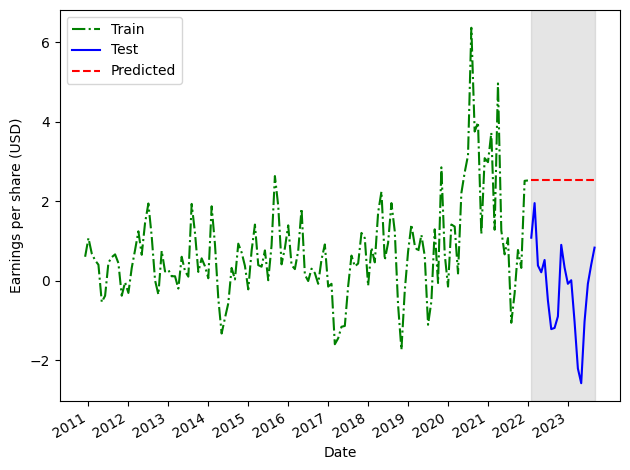

In [149]:
#PLOTANDO O GRAFICO
fig, ax = plt.subplots()

ax.plot(train['data'], train['ipa_m'], 'g-.', label='Train')
ax.plot(test['data'], test['ipa_m'], 'b-', label='Test')
ax.plot(test['data'], test['pred_last'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(134, 153, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(1, 156, 12), [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

fig.autofmt_xdate()
plt.tight_layout()


In [150]:
#PREVISAO INGENUA SAZONAL
test.loc[:, 'pred_last_season'] = train['ipa_m'][-20:].values

test

,data,ipa_m,pred_mean,pred__last_yr_mean,pred_last,pred_last_season
134,mar/22,1.08,0.743433,2.244,2.52,2.72
135,abr/22,1.95,0.743433,2.244,2.52,3.15
136,mai/22,0.38,0.743433,2.244,2.52,6.36
137,jun/22,0.21,0.743433,2.244,2.52,3.75
138,jul/22,0.52,0.743433,2.244,2.52,3.98
139,ago/22,-0.50,0.743433,2.244,2.52,1.17
140,set/22,-1.22,0.743433,2.244,2.52,3.08
141,out/22,-1.19,0.743433,2.244,2.52,2.98
142,nov/22,-0.90,0.743433,2.244,2.52,3.72
143,dez/22,0.90,0.743433,2.244,2.52,1.28


In [151]:
#RELACIONA A MEDIA DO CONJUNTO TESTE DE VALORES REAIS COM A MEDIA DO CONJUNTO TESTE ESPERADA
#RESULTADO DA MAPE
mape_naive_seasonal = mape(test['ipa_m'], test['pred_last_season'])
mape_naive_seasonal

852.9013400456121

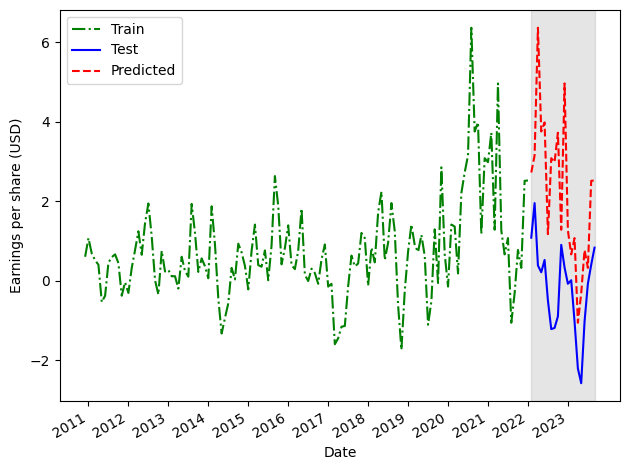

In [152]:
#PLOTANDO O GRAFICO COM OS RESULTADOS
fig, ax = plt.subplots()

ax.plot(train['data'], train['ipa_m'], 'g-.', label='Train')
ax.plot(test['data'], test['ipa_m'], 'b-', label='Test')
ax.plot(test['data'], test['pred_last_season'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(134, 153, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(1, 156, 12), [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

fig.autofmt_xdate()
plt.tight_layout()

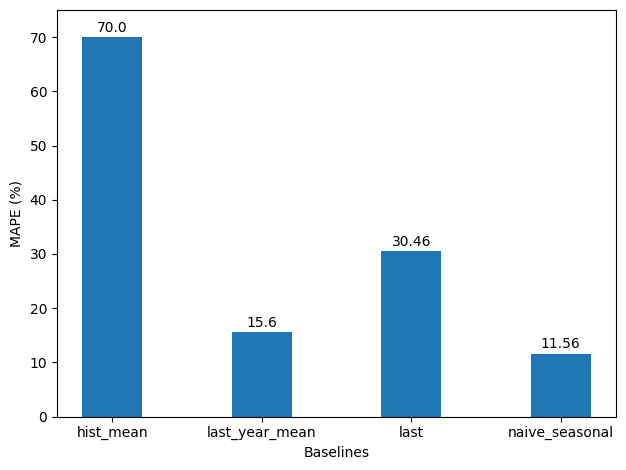

In [153]:
#PLOTANDO GRAFICO COM O RESULTADO DE TODAS AS TECNICAS INGENUAS DE PREVISAO UTILIZADAS
fig, ax = plt.subplots()

x = ['hist_mean', 'last_year_mean', 'last', 'naive_seasonal']
y = [70.00, 15.60, 30.46, 11.56]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Baselines')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 75)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(value), ha='center')

plt.tight_layout()

# RESPOSTA PRIMEIRA QUESTAO: O menor MAPE encontrado foi o da Média do Ultimo ano ( lasr_year_mean), apresentando o menor valor entre as outras análises feitas com 15.6. O resultado dos indices foram obtidos a partir da lista com os dados mensais do Ipa-m, ao qual foram criados dois conjuntos, um de teste e o outro de treino para que pudessemos tirar a média real da lista e a media esperada. As tecnicas ingênuas de previsão nos mostra resultados diferentes devido ao  fato de que a cada tecnica, os dados selecionados são diferentes ao longo do tempo. Na primeira análise todos os dados do conjunto treino foi utilizado; na segunda, apenas os valores do último ano; na terceira, apenas o último valor do conjunto.


O INDICE IPA_M É UM PASSEIO ALEATORIO?

In [154]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [155]:
IPAM_ADF_result = adfuller(df['ipa_m'])

print(f'ADF Statistic: {IPAM_ADF_result[0]}')
print(f'p-value: {IPAM_ADF_result[1]}')

ADF Statistic: -2.586038958791525
p-value: 0.09591719778785468


In [156]:
diff_close = np.diff(df['ipa_m'], n=1)

In [157]:
IPAM_diff_ADF_result = adfuller(diff_close)

print(f'ADF Statistic: {IPAM_diff_ADF_result[0]}')
print(f'p-value: {IPAM_diff_ADF_result[1]}')

ADF Statistic: -4.424531979781473
p-value: 0.00026852415175949914


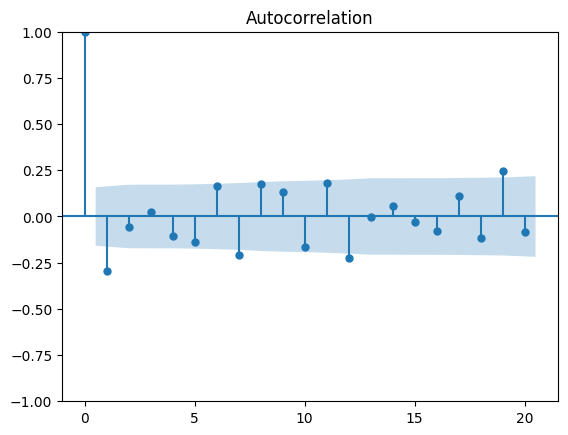

In [158]:
plot_acf(diff_close, lags=20);


# RESPOSTA 1.1: É UM PASSEIO ALEATÓRIO? Primeiramente foi realizado um teste ADF para verificar o valor de ADf e Valor-p, pois, se valor-p for maior que 0,05, então a série não é estacionária e neste caso é necessário primeiro transformar a série em estacionária para que depois seja confiável plotar a função de autocorrelação para identificarmos se a série é um passeio aleatorio ou não.
# Neste caso, a série não era estacionária e atravéz do código: diff_close = np.diff(df['ipa_m'], n=1), a mesma foi transformada em estacionária e logo em seguida a função de autocorrelação foi utilizada para confirmar o passeio aleatorio. O resultado da ADF foi -4.42 e o valor-p foi 0.00027, que é significativamente menor que 0.05. Isso nos permite rejeitar a hipótese nula, indicando que a série diferenciada é estacionária e o gráfico plotado  nos mostra a caracterista de uma série de passeio aleatório.